In [59]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [3]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how="left", on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [7]:
df["Mouse ID"].value_counts()

g989    13
s710    10
t565    10
u327    10
i901    10
        ..
l872     1
d133     1
b447     1
u153     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [8]:
df["Mouse ID"].nunique()

249

In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_time = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_time

array(['g989'], dtype=object)

In [18]:
#test
g989 = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Timepoint'].sum()
g989

50

In [26]:
# Optional: Get all the data for the duplicate mouse ID.
g989_df = df[df['Mouse ID']=='g989']
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='last')
clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [31]:
# Checking the number of mice in the clean DataFrame.
clean["Mouse ID"].nunique()

249

# Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Identify the diferrent Drug Regimen along with the total tumer volume for each using .groupby
regimen_grouped = clean.groupby(["Drug Regimen"])
regimen_grouped

#create a variable to capture the total tumor volume for each regimen
tumor_volume = regimen_grouped["Tumor Volume (mm3)"].sum()

#create computation for the mean of each regimen
regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean()

#Create computation for the median of each regimen
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median()

#Create computation for the variance of each regimen
regimen_variance = regimen_grouped["Tumor Volume (mm3)"].var()

#create computation for the standard deviation of each regimen
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()

#create computation for the SEM
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()

In [35]:
summary_stats = pd.DataFrame({"Total Tumor Volume": tumor_volume, "Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

#Format cells in Dataframe
summary_stats["Total Tumor Volume"] = summary_stats["Total Tumor Volume"].astype(float).map("{:,.2f}".format)

summary_stats["Mean"] = summary_stats["Mean"].astype(float).map("{:.2f}".format)

summary_stats["Median"] = summary_stats["Median"].astype(float).map("{:,.2f}".format)

summary_stats["Variance"] = summary_stats["Variance"].astype(float).map("{:,.2f}".format)

summary_stats["Standard Deviation"] = summary_stats["Standard Deviation"].astype(float).map("{:,.2f}".format)

summary_stats["SEM"] = summary_stats["SEM"].astype(float).map("{:,.2f}".format)

summary_stats

,Total Tumor Volume,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,"9,355.42",40.68,41.56,24.95,4.99,0.33
Ceftamin,"9,361.23",52.59,51.78,39.29,6.27,0.47
Infubinol,"9,413.49",52.88,51.82,43.13,6.57,0.49
Ketapril,"10,384.30",55.24,53.70,68.55,8.28,0.60
Naftisol,"10,105.67",54.33,52.51,66.17,8.13,0.60
Placebo,"9,780.08",54.03,52.29,61.17,7.82,0.58
Propriva,"8,171.75",52.38,50.78,43.22,6.57,0.53
Ramicane,"9,169.42",40.22,40.67,23.49,4.85,0.32
Stelasyn,"9,816.20",54.23,52.43,59.45,7.71,0.57


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


# Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#clean
#x_axis = np
#plt.bar(x_axis, users, color='r', alpha=0.5, align="center")
#pandas.plotting.table(ax, data, rowLabels=None, colLabels=None, **kwargs)

In [37]:
clean2 = clean['Drug Regimen'].value_counts()

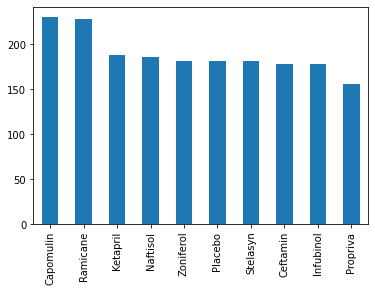

In [39]:
clean2.plot(kind='bar')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

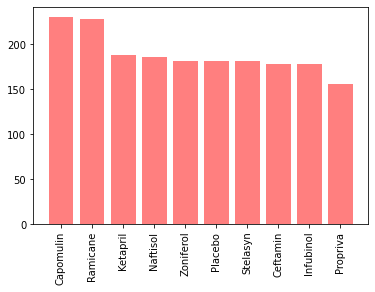

In [43]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(clean2.index, clean2.values, color='r', alpha=0.5, align="center")
plt.xticks(rotation=90)

In [41]:
clean2

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug Regimen, dtype: int64

# Generate a pie plot showing the distribution of female versus male mice using pandas

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = df.drop_duplicates(subset=['Mouse ID'], keep='first')

#Group by "Mouse ID" and "Sex" to find the unique number of male vs female
groupby_gender = gender.groupby(["Mouse ID","Sex"])
groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"].map('{:,.2f}'.format).astype(float)

#gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.8
Male,125,50.2


In [44]:
clean['Sex'].value_counts()

Male      958
Female    930
Name: Sex, dtype: int64

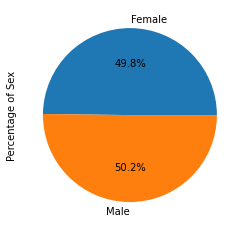

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#mouse_gender
mouse_gender['Percentage of Sex'].plot(kind='pie',autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x20100cf4850>,
 [Text(-0.712346908715398, -0.8381896453927457, ''),
  Text(0.7123468302384167, 0.8381897120874728, '')],
 [Text(-0.38855285929930794, -0.45719435203240666, '49.8%'),
  Text(0.3885528164936818, 0.45719438841134874, '50.2%')])

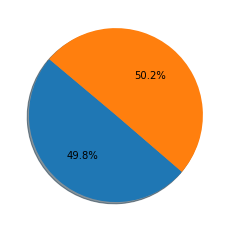

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#mouse_gender
#explode = (0.1, 0, 0, 0)
#explode=explode, labels=labels, colors=colors
plt.pie(mouse_gender['Percentage of Sex'].values, autopct="%1.1f%%", shadow=True, startangle=140)

# Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen